In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("../data/decision_tree_sample.csv")

Variables to track:

|Variable | Description|
|:--|:--|
|Down          |The current down (1st, 2nd, 3rd, or 4th)|
|Score         |Difference in score between the two teams|
|Seconds       |Number of seconds remaining in the game|
|AdjustedScore |Score / sqrt(Seconds + 1)|
|Spread        |Las Vegas pre-game point spread|
|TIMO          |Time outs remaining offense|
|TIMD          |Time outs remaining defense|
|TOTp          |Total points scored|
|Yardline      |Yards from own goal line|
|YTG           |Yards to go for a first down|

In [3]:
dataset.columns

Index(['id', 'offense', 'offense_conference', 'defense', 'defense_conference',
       'home', 'away', 'offense_score', 'defense_score', 'game_id', 'drive_id',
       'drive_number', 'play_number', 'period', 'clock', 'offense_timeouts',
       'defense_timeouts', 'yard_line', 'yards_to_goal', 'down', 'distance',
       'scoring', 'yards_gained', 'play_type', 'play_text', 'ppa',
       'time_remaining', 'score', 'adj_score', 'target',
       'yards_from_own_goal_line', 'yards_to_go_for_first_down', 'defense_elo',
       'offense_elo'],
      dtype='object')

In [4]:
dataset.head()

,id,offense,offense_conference,defense,defense_conference,home,away,offense_score,defense_score,game_id,...,play_text,ppa,time_remaining,score,adj_score,target,yards_from_own_goal_line,yards_to_go_for_first_down,defense_elo,offense_elo
0,401112133104877811,TCU,Big 12,Texas Tech,Big 12,Texas Tech,TCU,30,31,401112133,...,Max Duggan pass complete to John Stephens Jr. ...,0.797657,741,-1,-0.036711,True,76,10,1562.118396,1668.668838
1,302752649118,Wyoming,Mountain West,Toledo,Mid-American,Toledo,Wyoming,17,0,302752649,...,Austyn Carta-Samuels rush for 1 yard to the To...,-0.410472,1648,17,0.418638,True,82,4,1557.767925,1484.171947
2,283200278056,New Mexico State,Western Athletic,Fresno State,Western Athletic,Fresno State,New Mexico State,10,3,283200278,...,"New Mexico St penalty 5 yard offside accepted,...",NaN,2765,7,0.133098,False,30,0,1525.882292,1297.346558
3,252880194073,Michigan State,Big Ten,Ohio State,Big Ten,Ohio State,Michigan State,10,7,252880194,...,Jelani Nantambo rush for 6 yards to the MSU 48.,0.395721,2420,3,0.060971,False,42,10,1843.976595,1660.906975
4,400547884101955501,Baylor,Big 12,Kansas,Big 12,Baylor,Kansas,13,7,400547884,...,Bryce Petty run for 7 yds to the Kans 3 for a ...,NaN,2984,6,0.109819,True,90,7,1394.720220,1629.140650


In [5]:
dataset["target"]

0         True
1         True
2        False
3        False
4         True
         ...  
99995     True
99996     True
99997     True
99998    False
99999     True
Name: target, Length: 100000, dtype: bool

In [6]:
X = dataset[["down",
             "score",
             "time_remaining",
             "adj_score",
             "yards_from_own_goal_line",
             "yards_to_go_for_first_down",
             "defense_elo",
             "offense_elo",
             "offense_timeouts",
             "defense_timeouts",
             "offense_score",
             "defense_score"]].fillna(0)

y = dataset["target"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.83815

In [8]:
X.head()

,down,score,time_remaining,adj_score,yards_from_own_goal_line,yards_to_go_for_first_down,defense_elo,offense_elo,offense_timeouts,defense_timeouts,offense_score,defense_score
0,1,-1,741,-0.036711,76,10,1562.118396,1668.668838,3.0,3.0,30,31
1,3,17,1648,0.418638,82,4,1557.767925,1484.171947,0.0,0.0,17,0
2,1,7,2765,0.133098,30,0,1525.882292,1297.346558,0.0,0.0,10,3
3,1,3,2420,0.060971,42,10,1843.976595,1660.906975,0.0,0.0,10,7
4,3,6,2984,0.109819,90,7,1394.720220,1629.140650,3.0,2.0,13,7


In [25]:
for index, row in X.head().iterrows():
    prob = clf.predict_proba([row])[0][1]
    outcome = y[index]
    print(prob)
    print(outcome)

0.9
True
0.99
True
0.31
False
0.19
False
0.96
True


In [26]:
bin_1 = [] # 0-9%
bin_2 = [] # 10-19%
bin_3 = [] # 20-29%
bin_4 = [] # 30-39%
bin_5 = [] # 40-49%
bin_6 = [] # 50-59%
bin_7 = [] # 60-69%
bin_8 = [] # 70-79%
bin_9 = [] # 80-89%
bin_10 = [] # 90-100%

for index, row in X.iterrows():
    prob = clf.predict_proba([row])[0][1]
    outcome = y[index]
    if prob < 0.1:
        bin_1.append(outcome)
    elif prob < 0.2:
        bin_2.append(outcome)
    elif prob < 0.3:
        bin_3.append(outcome)
    elif prob < 0.4:
        bin_4.append(outcome)
    elif prob < 0.5:
        bin_5.append(outcome)
    elif prob < 0.6:
        bin_6.append(outcome)
    elif prob < 0.7:
        bin_7.append(outcome)
    elif prob < 0.8:
        bin_8.append(outcome)
    elif prob < 0.9:
        bin_9.append(outcome)
    else:
        bin_10.append(outcome)
  

In [27]:
bins = [bin_1, bin_2, bin_3, bin_4, bin_5, bin_6, bin_7, bin_8, bin_9, bin_10]
x = 1
for i in bins:
    print(str(x) + ":" + str(sum(i)))
    x+=1

1:69
2:191
3:305
4:414
5:549
6:771
7:1852
8:4946
9:9779
10:32881


In [32]:
x = 1
pred_win = []
for i in bins:
    prob = sum(i)/len(i)
    print(str(x) + ":" + str(prob))
    pred_win.append(prob)
    x+=1

1:0.002458140363377271
2:0.018775189226383566
3:0.05227077977720651
4:0.15640347563279183
5:0.41402714932126694
6:0.5673289183222958
7:0.7986200948684777
8:0.9360333080999244
9:0.9791729248022429
10:0.9963939393939394


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
pred_win = [i*100 for i in pred_win]
pred_win

[0.2458140363377271,
 1.8775189226383566,
 5.227077977720651,
 15.640347563279184,
 41.40271493212669,
 56.73289183222958,
 79.86200948684777,
 93.60333080999243,
 97.91729248022429,
 99.63939393939394]

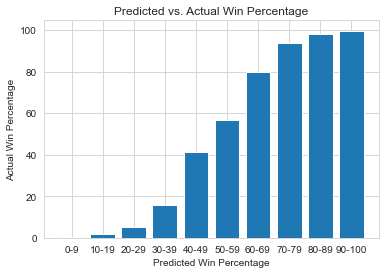

In [54]:
x_axis = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']
#sns.set_style("whitegrid")
plt.xlabel("Predicted Win Percentage")
plt.ylabel("Actual Win Percentage")
plt.title("Predicted vs. Actual Win Percentage")
plt.bar(x_axis, pred_win)
plt.savefig('error_analysis.png')